In [29]:
from bs4 import BeautifulSoup as soup
import requests

In [30]:
url="https://turkishnetworktimes.com/kategori/gundem/"


In [31]:
html=requests.get(url)

In [32]:
bsobj=soup(html.content,'lxml')


In [33]:
r=requests.get("https://turkishnetworktimes.com/kategori/gundem/")

In [34]:
b=soup(r.content,'lxml')


In [35]:
header=[]
for news in b.findAll(['h2', 'strong']):
  
  #print(news.text)
  header.append(news.text)


In [36]:
url=[]
for news in b.findAll('a',{'class':'post-link'}):
    url.append(news['href'])


In [37]:
summary=[]

for news in b.findAll('div',{'class':'haber-desc'}):
  
  #print(news.text)
  summary.append(news.text)


In [38]:
img_url_list=[]
for news in b.findAll('img',{'class':'wp-post-image'}):
    img_url_list.append(news['src'])


In [39]:
text=[]
for link in url:
    page=requests.get(link)
    bsobj=soup(page.content)
    for news in bsobj.findAll('div',{'class':'yazi_icerik'}):
        text.append(news.text.strip())


In [40]:
publish_date=[]
for link in url:
    page=requests.get(link)
    bsobj=soup(page.content)
    for news in bsobj.findAll('span',{'class':'tarih'}):
        if 'Yayınlanma:' in news.get_text():
             
         publish_date.append(news.text.strip())


In [41]:
update_date=[]
for link in url:
    page=requests.get(link)
    bsobj=soup(page.content)
    for news in bsobj.findAll('span',{'class':'tarih'}):
        if 'Güncelleme:' in news.get_text():
             
         update_date.append(news.text.strip())


In [42]:
import csv



# CSV dosyası adı ve yazma modu
file_name = "gundem_veriler.csv"

# Veri başlıkları
column_names = ['URL', 'Header', 'Summary', 'Text', 'Img URL', 'Publish Date','Update Date']

# Verileri birleştirme
combined_data = zip(url, header, summary, text, img_url_list, publish_date, update_date)

# CSV dosyasına yazma
with open(file_name, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    # Başlık satırını yazma
    writer.writerow(column_names)

    # Her bir satırı CSV dosyasına yazma
    for row in combined_data:
        writer.writerow(row)

print(f"{file_name} adlı CSV dosyası oluşturuldu.")

gundem_veriler.csv adlı CSV dosyası oluşturuldu.


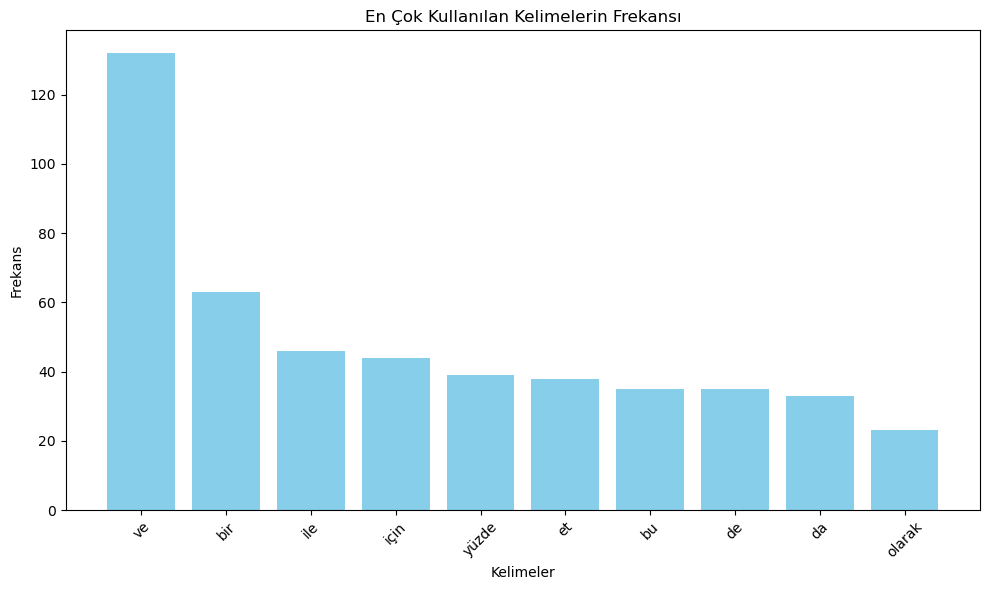

In [43]:
from collections import Counter
from matplotlib import pyplot as plt

# text listesindeki metinleri birleştirme
all_text = ' '.join(text)

# Kelimeleri ayıklama ve küçük harfe dönüştürme
words = all_text.lower().split()

# Kelime frekanslarını hesaplama
word_freq = Counter(words)

# En çok kullanılan 10 kelimeyi bulma
top_words = word_freq.most_common(10)
top_words, word_freq

# Grafiği oluşturma
top_word, freq = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.bar(top_word, freq, color='skyblue')
plt.title('En Çok Kullanılan Kelimelerin Frekansı')
plt.xlabel('Kelimeler')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()